In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# importing dataset
digit_mnist = keras.datasets.mnist
(x_train_full, y_train_full), (x_test, y_test) = digit_mnist.load_data()
x_train_full.shape

11501568/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)

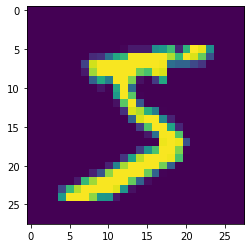

In [3]:
plt.imshow(x_train_full[0])

In [4]:
# feature scaling
x_train_n = x_train_full / 255.
x_test_n = x_test / 255.

In [5]:
# Train_Valid_Test Split
x_valid, x_train = x_train_n[:6000],x_train_n[6000:]
y_valid, y_train = y_train_full[:6000],y_train_full[6000:]
x_test = x_test_n
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
#Model Building
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(200,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
metrics=['accuracy'],
optimizer = 'sgd')
# model training
model_r = model.fit(x_train,y_train,epochs=60,
validation_data=(x_valid,y_valid))

Epoch 1/60
1688/1688 [==============================] - 5s 2ms/step - loss: 0.6607 - accuracy: 0.8267 - val_loss: 0.3216 - val_accuracy: 0.9125
Epoch 2/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3006 - accuracy: 0.9141 - val_loss: 0.2585 - val_accuracy: 0.9285
Epoch 3/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2488 - accuracy: 0.9292 - val_loss: 0.2254 - val_accuracy: 0.9387
Epoch 4/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2151 - accuracy: 0.9389 - val_loss: 0.1962 - val_accuracy: 0.9442
Epoch 5/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1893 - accuracy: 0.9461 - val_loss: 0.1790 - val_accuracy: 0.9483
Epoch 6/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1690 - accuracy: 0.9517 - val_loss: 0.1636 - val_accuracy: 0.9522
Epoch 7/60
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1521 - accuracy: 0.9570 - val_loss: 0.1482 - val_accuracy:

In [7]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0739 - accuracy: 0.9796


[0.07394343614578247, 0.9796000123023987]

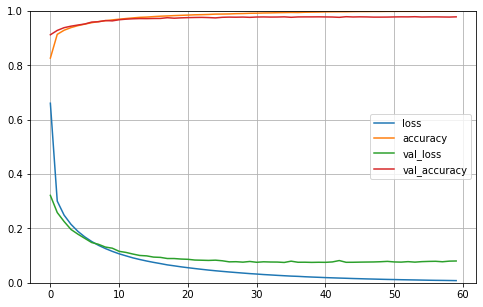

In [8]:
# Val-loss
pd.DataFrame(model_r.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [9]:
# predicting first five Digits
x_new=x_test[:5]
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
predict_x = model.predict(x_new)
classes_x=np.argmax(predict_x,axis=1)
# Output
classes_x

array([7, 2, 1, 0, 4], dtype=int64)